In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist


(x_train, y_train) , (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  12  56 140 126 175 200  96   2
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  35 166 238 254 246 242 253 246 254  67
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 184 182 146 127  70  30  45  36 215 175
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30   0   0   0   0   0   0   0 207 246
   14   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  5

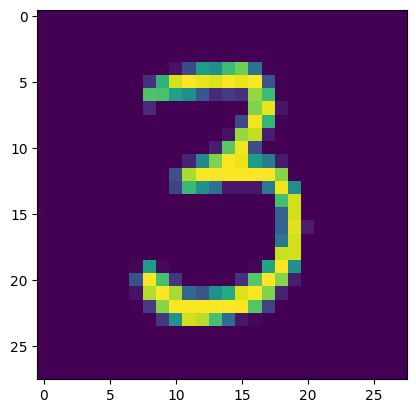

In [3]:
import matplotlib.pyplot as plt
plt.imshow(x_train[50])
print(x_train[50])

In [5]:
x_train = tf.keras.utils.normalize(x_train , axis=1)
x_test = tf.keras.utils.normalize(x_test , axis=1)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

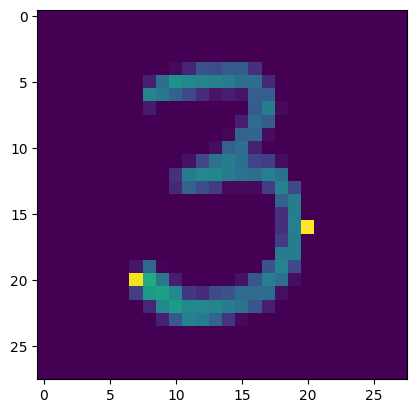

In [6]:
plt.imshow(x_train[50])
print(x_train[50])

In [7]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))
model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy' , metrics=['accuracy'])
model.fit(x_train,y_train , epochs=3)


Epoch 1/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2608 - accuracy: 0.9241
Epoch 2/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1083 - accuracy: 0.9664
Epoch 3/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0740 - accuracy: 0.9772


In [8]:
val_loss , val_acc = model.evaluate(x_test,y_test)
print(val_loss , val_acc)

313/313 [==============================] - 3s 7ms/step - loss: 0.1079 - accuracy: 0.9667
0.10793740302324295 0.96670001745224


In [9]:
model.save('num_reader.model')

In [10]:
new_model = tf.keras.models.load_model('num_reader.model')

In [11]:
predictions = new_model.predict([x_test])
print(predictions)

313/313 [==============================] - 1s 4ms/step
[[2.6109228e-09 7.2398075e-07 2.0630321e-05 ... 9.9992853e-01
  1.0721922e-07 3.9859065e-06]
 [1.0584660e-05 4.0722362e-04 9.9944651e-01 ... 1.7567178e-08
  3.2992475e-06 7.7745366e-10]
 [1.4493482e-08 9.9996895e-01 4.3570376e-06 ... 1.3445847e-05
  9.3135322e-06 3.0270931e-07]
 ...
 [3.7095649e-10 9.4240721e-07 4.8202285e-08 ... 1.4890705e-06
  3.7791963e-06 1.4905022e-03]
 [2.2697702e-06 1.2216493e-07 1.2193459e-07 ... 1.2135685e-05
  5.0918688e-04 7.9168416e-07]
 [3.8334839e-08 5.8807076e-10 6.2149659e-09 ... 1.2376635e-12
  1.3796193e-07 1.6726452e-10]]


In [21]:
import numpy as np
print(np.argmax(predictions[100]))

6


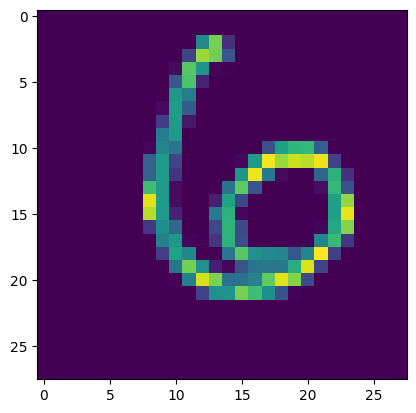

In [22]:
plt.imshow(x_test[100])
plt.show()